# Контекст:
Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Ниже я приоритизирую гипотезы, запущу A/B-тест и проанализирую результаты проведенной работы.

In [2]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

from datetime import timedelta
import datetime as dt

# Часть 1. Приоритизация гипотез

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
## Задачи:
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.


Откроем файл hypothesis.csv и ознакомимся с ним:

In [3]:
try:
    hypothesis = pd.read_csv('hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [64]:
pd.options.display.max_colwidth = 150
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


In [65]:
#приведем названия столбцов к нижнему регистру

hypothesis.columns = hypothesis.columns.str.lower()

In [68]:
pd.options.display.max_colwidth = 150
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice,rice
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


In [7]:
hypothesis.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

Пропусков в 'hypothesis' нет

***Для приоритизации гипотез мы применим два метода: фреймворк ICE и фреймворк RICE.
Они отличаются друг от друга тем, что RICE учитывает уровень охвата пользователей (масштаб, который затронут изменения) (параметр Reach). Модель ICE дает систему относительной приоритизации, а не точных подсчетов, основанных на данных, но при этом, она менее трудозатратна и более быстра для подсчетов. Тем не менее, ICE не включает в анализ такой показатель, как широта охвата***

**Применим фреймворк ICE для приоритизации гипотез:**

In [69]:
#hypothesis['ICE'] = (hypothesis['impact'] *hypothesis['confidence'])/hypothesis['efforts']
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)

hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Наиболее перспективные гипотезы по ICE:** 8, 0, 7, 6, 2

**Применим фреймворк RICE для приоритизации гипотез:**

In [70]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] *hypothesis['confidence'])/hypothesis['efforts']

hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По **RICE** мы видим несколько иную картину. **Наиболее перспективные гипотезы по RICE:** 7, 2, 0, 6.

<div class="alert alert-success">

Гипотеза 7 имеет наиболее высокий показатель влияния reach = 10, это повлияло на ее приоритет и первое место в рейтинге по RICE.

# Вывод:
По фреймворку ICE наиболее приоритетными оказались гипотезы (выделим ТОП 3):

8. Запустить акцию, дающую скидку на товар в день рождения
0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

А по фреймворку RICE наиболее приоритетные гипотезы следующие (ТОП 3):

7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
Гипотеза 7 встала на первое место. Это произошло из-за того, что фреймворк RICE учитывает параметр Reach (количество пользователей,которых затронет вносимое изменение). Гипотезы 2 и 0 оказались в ТОП 3 также благодаря показателю охвата пользователей.

# Часть 2. Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача:**

**Проанализировать A/B-тест:**
1.	Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2.	Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3.	Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4.	Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
5.	Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
6.	Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7.	Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8.	Построить точечный график стоимостей заказов. Сделать выводы и предположения.
9.	Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10.	Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
11.	Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12.	Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
13.	Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14.	Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.


In [10]:
try:
    visitors, orders = (pd.read_csv('visitors.csv'),
                        pd.read_csv('orders.csv')
                        )
except:
    visitors, orders = (pd.read_csv('/datasets/visitors.csv'),
                        pd.read_csv('/datasets/orders.csv')
                        )

## Ознакомимся с датасетами и подготовим данные к анализу:

In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Приведем 'date' к типу datetime:

In [13]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [14]:
visitors.duplicated().sum()

0

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [16]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Пропусков в датасетах visitors и orders нет.

In [17]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Переименуем столбцы в orders и преведем 'date' к типу datetime:

In [18]:
orders = orders.rename(columns={"transactionId": "orderId", "visitorId": "userId"})
orders['date'] = pd.to_datetime(orders['date'])

In [19]:
orders.duplicated().sum()

0

In [20]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Пропусков нет. Даты в visitors и orders приведены к типу date

In [53]:
# проверим группы на пользователей, участвовавших в нескольких группах теста одновременно 
gr_a = orders[orders['group'] == 'A']['userId']
gr_b = orders[orders['group'] == 'B']['userId']
orders_ab = orders.query('userId in @gr_a and userId in @gr_b')
print('Количество пользователей в двух группах:', orders_ab['userId'].nunique())
print('Всего пользователей в тесте:', orders['userId'].nunique())
print('Относительное количество пользователей в двух группах:', round(orders_ab['userId'].nunique()/orders['userId'].nunique(), 2) )

Количество пользователей в двух группах: 58
Всего пользователей в тесте: 1031
Относительное количество пользователей в двух группах: 0.06


***Выводы и комментарии:***


Количество пользователей, попавших в две группы теста одновременно, составляет 58 чел. или 6% от всего количества пользователей. Считаем целесообразным не удалять их из общей выборки, так как их число невелико.

## 2.1. Построим график кумулятивной выручки по группам

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates(): 

In [21]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 


In [22]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <=\
                                                                     x['date'], orders['group'] == x['group'])]\
                                     .agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
                                     .sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <=\
                                                                         x['date'], visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                                       .sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем  столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
#добавим показатели среднего чека на пользователя
cumulativeData['avg_ord'] = cumulativeData['revenue'] / cumulativeData['orders']
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors      avg_ord
0 2019-08-01     A      24      20   148579       719  6190.791667
1 2019-08-01     B      21      20   101217       713  4819.857143
2 2019-08-02     A      44      38   242401      1338  5509.113636
3 2019-08-02     B      45      43   266748      1294  5927.733333
4 2019-08-03     A      68      62   354874      1845  5218.735294


**Построим графики кумулятивной выручки по дням и группам A/B-тестирования:**

In [23]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'avg_ord']].reset_index(drop=True)

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'avg_ord']].reset_index(drop=True)


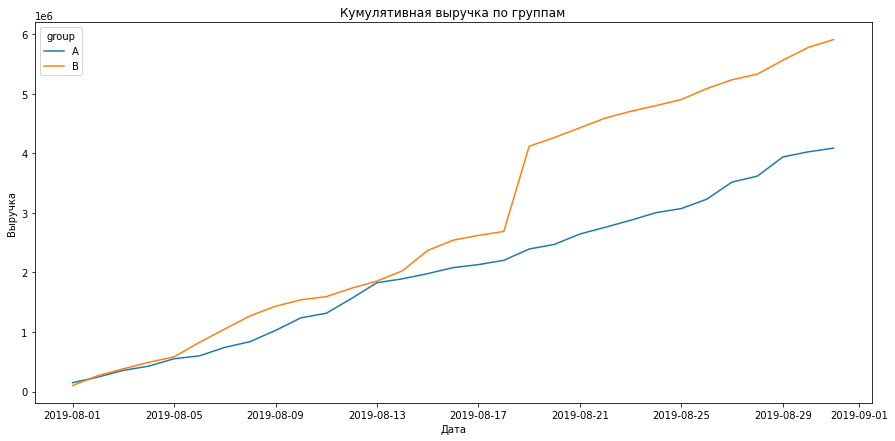

In [24]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x="date", y="revenue", hue="group",
                  data=cumulativeData)
ax.set_title('Cumulative Revenue')
plt.title('Кумулятивная выручка по группам') 
plt.xlabel('Дата') 
plt.ylabel('Выручка')
plt.show()

***Выводы и комментарии:***

Выручка в обеих группах увеличивается в течение всего теста. Это хороший знак.
Группа В начинает опережать группу А по выручке уже 2019-08-05 и придерживается этой тенденции до конца рассматриваемого периода. Резкий скачок роста произошел 18 августа. Возможно, произошел резкий скачок количества заказов в данной группе, либо увеличилась стоимость заказов.

## 2.2. Построим график кумулятивного среднего чека по группам

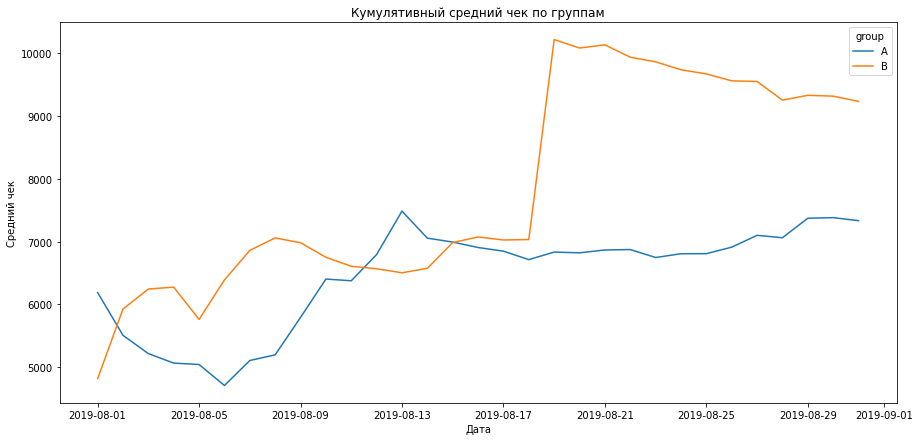

In [25]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x="date", y='avg_ord',
                  hue="group", data=cumulativeData)
ax.set_title('Cumulative average order value')
plt.title('Кумулятивный средний чек по группам') 
plt.xlabel('Дата') 
plt.ylabel('Средний чек')
plt.show()

***Выводы и комментарии:***

Здесь видна несколько иная картина.
Виден резкий всплеск на графике группы В после 17 августа. У группы А средний чек стабилизируется ближе к середине графика. Вероятно, в группу В попали крупные и дорогостоящие заказы и они искажают результаты теста. Тогда нам нужно больше данных, чтобы прийти к реальному среднему чеку.

## 2.3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A

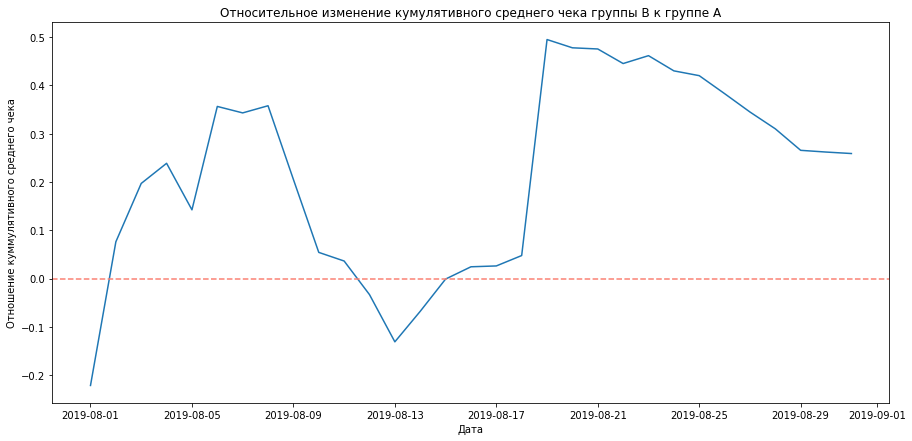

In [26]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x='date', y=((cumulativeRevenueB['avg_ord']/ cumulativeRevenueA['avg_ord']) - 1),data=cumulativeRevenueA) 
ax.set_title('Относительное изменение кумулятивного среднего чека группы B к группе A')
ax.axhline(0, color='salmon', linestyle='--')
plt.xlabel('Дата') 
plt.ylabel('Отношение куммулятивного среднего чека')
plt.show()

***Выводы и комментарии:***

Данный график подтверждает наше предположение: после 17 августа отношение среднего чека группы В к группе А резко меняется. Но этому также предшествуют большие колебания. Данные колебания усиливают предположения о наличии аномальных данных по группе В. К концу периода график не стабилизируется.

## 2.4. Построим график кумулятивного среднего количества заказов на посетителя по группам

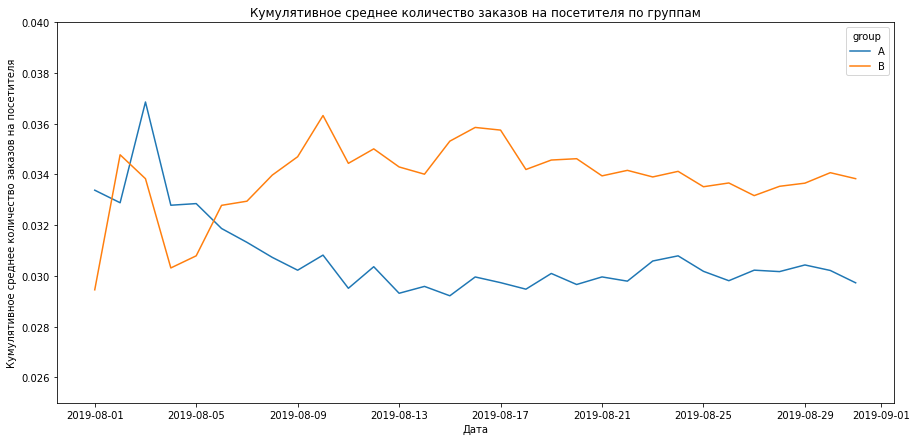

In [54]:
cumulativeData['avg_orders'] = cumulativeData['orders'] / cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


#построим график кумулятивного среднего количества заказов на посетителя по группам
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x='date', y='avg_orders',
                  hue="group", data=cumulativeData)

ax.set(ylim=(0.025, 0.04))

plt.title('Кумулятивное среднее количество заказов на посетителя по группам') 
plt.xlabel('Дата') 
plt.ylabel('Кумулятивное среднее количество заказов на посетителя')
plt.show()

***Выводы и комментарии:***

После всплеска и колебаний кумулятивного среднего количества заказов, показатели группы A стали уменьшаться, а группы B расти. Кумулятивное среднеее количество заказов на посетителя группы B стало выше данного показателя группы A после 05.08.2019 и стабилизировалась после 17 августа. Среднеее количество заказов на посетителя группы А стабилизировалось после 13 августа.

## 2. 5.	Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

In [55]:
mergedCumulativeAvgOrders = cumulativeDataA[['date','avg_orders']].merge(cumulativeDataB[['date','avg_orders']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

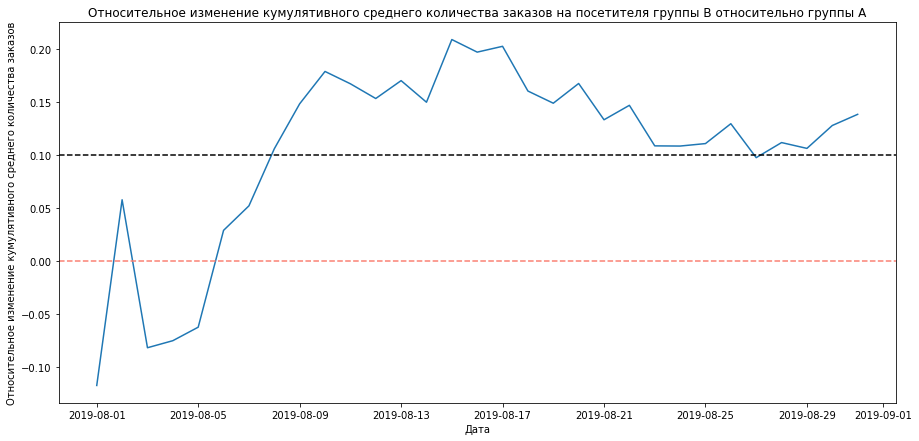

In [57]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x='date', y=((mergedCumulativeAvgOrders['avg_ordersB']/ mergedCumulativeAvgOrders['avg_ordersA']) - 1)
                  ,data=mergedCumulativeAvgOrders) 

ax.axhline(0, ls='--', color='salmon')
ax.axhline(0.1, ls='--', color='black')

plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B относительно группы A') 
plt.xlabel('Дата') 
plt.ylabel('Относительное изменение кумулятивного среднего количества заказов');

***Выводы и предположения:***

Почти с самого начала группа B лидирует по относительному изменению кумулятивного среднего количества заказов на посетителя: изначально прирост колебался и какое-то время лидировала группа А, но затем группа В вышла вперед и стабильно росла после 5 августа. Колебания прироста сначала были от 15% до 20%, но к концу месяца стабилизировались в районе 10-15%.

## 2.6.Построим точечный график количества заказов по пользователям

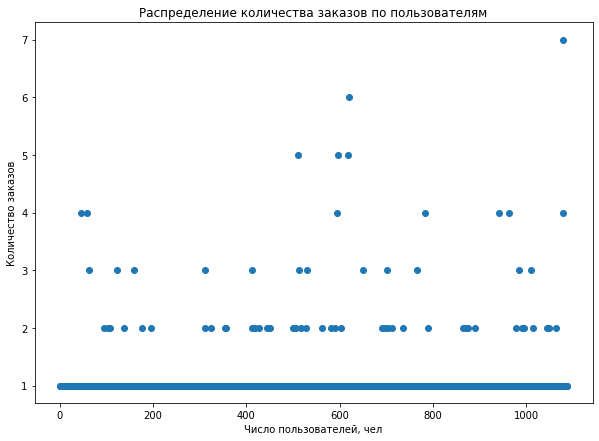

In [30]:
ordersByUsers = orders.groupby(['userId', 'group'], as_index=False).agg({'orderId': 'nunique'})
ordersByUsers.columns = ['userId','group','orders']

plt.figure(figsize=(10, 7))
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Число пользователей, чел')
plt.ylabel('Количество заказов')
plt.show()

**Рассмотрим распределение количества заказов по пользователям в разрезе групп:**

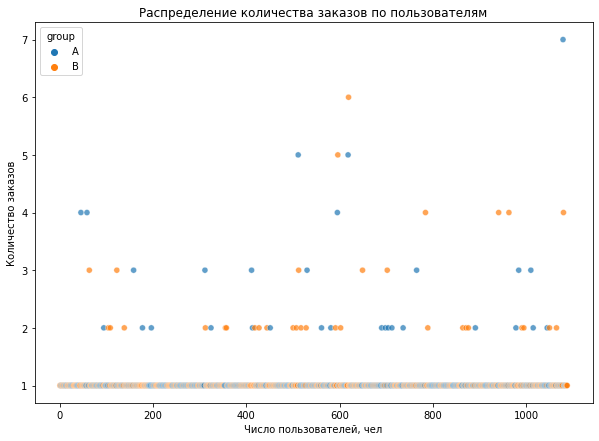

In [31]:

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(10, 7))
ax = sns.scatterplot(x=x_values, y="orders", hue='group',hue_order=['A', 'B'],
                     data=ordersByUsers, alpha=.7)

plt.title('Распределение количества заказов по пользователям') 
plt.xlabel('Число пользователей, чел') 
plt.ylabel('Количество заказов')
plt.show()

***Выводы и комментарии:***

Большинство пользователей заказывали всего 1 раз. Но есть достаточно много пользователей, которые делали два и более заказов. Доля тех, кто оформлял 2, 3 и даже 4 заказа достаточно велика. Самый заметный выброс наблюдается у группы А (7 заказов у более 1000 чел.)

## 2.7.	Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

In [32]:
print('Колличество заказов для 95% и 99% пользователей = {} шт.'
      .format(np.percentile(ordersByUsers['orders'], [95, 99])))

Колличество заказов для 95% и 99% пользователей = [2. 4.] шт.


***Выводы и комментарии:***

- не более 5% пользователей оформляли более 2 заказов
- не более 1% пользователей оформляли более 4 заказов

Выберем границу для отсеивания аномальных пользователей равную количеству пользователей, которые совершали более 2 заказов.

## 2.8.	Построим точечный график стоимостей заказов

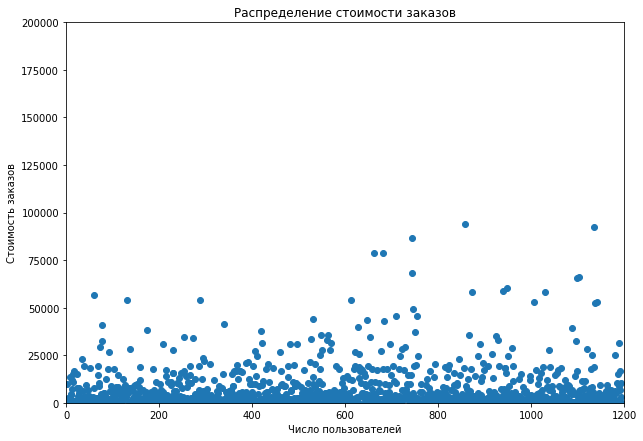

In [33]:
plt.figure(figsize=(10, 7))
x_values = pd.Series(range(0,len(orders)))
plt.axis([0, 1200, 0, 200000])
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимости заказов')
plt.xlabel('Число пользователей')
plt.ylabel('Стоимость заказов');

***Рассмотрим распределение стоимости заказов по пользователям в разрезе групп:***

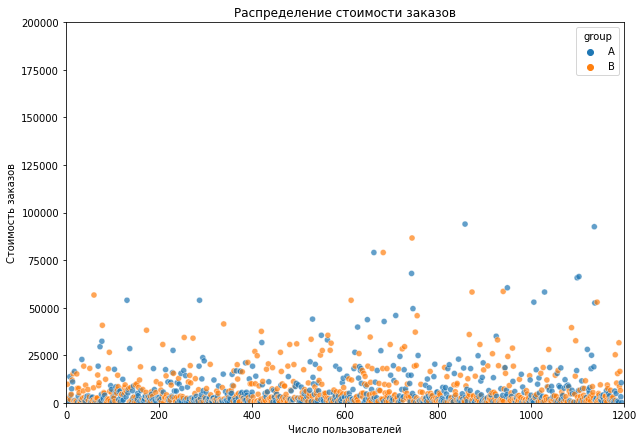

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(10, 7))
plt.axis([0, 1200, 0, 200000])
ax = sns.scatterplot(x=x_values, y="revenue", hue='group',hue_order=['A', 'B'],
                     data=orders, alpha=.7)

plt.title('Распределение стоимости заказов')
plt.xlabel('Число пользователей')
plt.ylabel('Стоимость заказов');

***Выводы и комментарии:***

Большинство заказов не превышают стоимости 25 000 - 30 000 руб.

## 2. 9.	Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов

In [35]:
print('Стоимость заказов для 95% и 99% пользователей = {}'
      .format(np.percentile(orders['revenue'], [95, 99])))

Стоимость заказов для 95% и 99% пользователей = [28000.  58233.2]


- не более 5% заказов дороже 28 000 руб
- не более 1% заказов дороже 58 233.2 руб

***Выводы и комментарии:***

За аномальные заказы примем те, стоимость которых выше 28 000 руб.

## 2.10.	Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Объявим гипотезы:

Н0 - различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет

Н1 - различия в среднем количестве заказов на посетителя между группами по «сырым» данным есть

В наших данных есть выбросы, игнорировать которые мы не можем. 
Поэтому проверять гипотезы мы будем с помощью **критерия Манна-Уитни**. Его плюс в том, что при фиксированном уровне значимости он обладает большой мощностью и точностью: чаще обнаруживает различия между распределениями, если они есть. 

Уровень значимости альфа зафиксируем на уровне 5% (или 0.05).

In [36]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


In [37]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [38]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [39]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


In [58]:
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('P-value: {0:.4f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print("Относительный прирост среднего количества заказов на посетителя группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.0168
Отвергаем нулевую гипотезу
Относительный прирост среднего количества заказов на посетителя группы B: 0.138


***Выводы и комментарии:***

P-value значительно меньше коэффициента значимости альфа, равного 0.05, поэтому мы отвергаем нулевую гипотезу о равенстве показателя среднего количества заказов на посетителя в группах. Анализ «сырых данных» сообщает, что в данном показателе между группами есть статистически значимые различия. Относительный прирост среднего количества заказов на посетителя группы B к показателю группы A равен 13.8%.

## 2.11.	Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Обозначим гипотезы

Н0 - различия в среднем чеке заказа между группами по «сырым» данным статистически не значимы

Н1 - различия в среднем чеке заказа между группами по «сырым» данным статистически значимы

In [41]:
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p-значение: {:.3f}'.format(results))
if (results < alpha):
    print('Отвергаем нулевую гипотезу: различия в среднем чеке заказа между группами по «сырым» данным статистически значимы.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: различия в среднем чеке заказа между группами по «сырым» данным статистически не значимы.')
print('Относительный прирост в среднем чеке группы B: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


p-значение: 0.729
Не получилось отвергнуть нулевую гипотезу: различия в среднем чеке заказа между группами по «сырым» данным статистически не значимы.
Относительный прирост в среднем чеке группы B: 0.259


***Выводы и комментарии:***

P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между группами по «сырым» данным составляет 25.9%. На данное различие могли повлиять аномальные показатели стоимости заказов.

## 2.12.	Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Выше мы определили границу для отсеивания аномальных пользователей равную количеству пользователей, которые совершали более 2 заказов и стоимость которых выше 28 000 руб.

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [60]:
#Узнаем, сколько всего аномальных пользователей атрибутом shape.

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] >np.percentile(orders['revenue'], 95)]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 


1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: userId, dtype: int64
74


**Всего 74 аномальных пользователя.**

In [63]:
# отношение количества аномальных пользователей к общему количеству пользователей из таблицы orders:
abnorm = abnormalUsers.shape[0] / orders['userId'].nunique()
print('Oтношение количества аномальных пользователей к общему количеству пользователей: {0:.2f}'.format(abnorm))

Oтношение количества аномальных пользователей к общему количеству пользователей: 0.07


***Комментарий:***

Аномальные пользователи составляют 7% от всех пользователей таблицы orders. Когда мы исключаем эти аномалии из анализа, мы теряем 7% пользователей.

In [61]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
# Применим статистический критерий Манна-Уитни к полученным выборкам:
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p-value: {:.3f}'.format(results))
if (results < alpha):
    print('Отвергаем нулевую гипотезу: различия в среднем количестве заказов между группами по «очищенным» данным статистически значимы.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: различия в среднем количестве заказов между группами по «очищенным» данным статистически не значимы.')

    

print('Относительный прирост в среднем количестве заказов на посетителя группы B: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))       

p-value: 0.013
Отвергаем нулевую гипотезу: различия в среднем количестве заказов между группами по «очищенным» данным статистически значимы.
Относительный прирост в среднем количестве заказов на посетителя группы B: 0.173


***Выводы:***

Различия в среднем количестве заказов между группами по «очищенным» данным статистически значимы. Относительный прирост среднего количества заказов на посетителя группы B к среднему количеству заказов на посетителя группы A по «очищенным» данным равен 17.3%.

## 2.13.	Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [44]:
#отфильтруем аномальных пользователей
sampleAFiltered_revenue = orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue']

sampleBFiltered_revenue = orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'] 

#посчитаем статистическую значимость различий
results = (stats.mannwhitneyu(sampleAFiltered_revenue, sampleBFiltered_revenue)[1])

print('p-value: {:.3f}'.format(results))
if (results < alpha):
    print('Отвергаем нулевую гипотезу: различия в среднем чеке заказа между группами по «очищенным» данным статистически значимы.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: различия в среднем чеке заказа между группами по «очищенным» данным статистически не значимы.')

    

print('Относительный прирост в среднем чеке группы B: {0:.3f}'.format(sampleBFiltered_revenue.mean()/sampleAFiltered_revenue.mean()-1))  

p-value: 0.738
Не получилось отвергнуть нулевую гипотезу: различия в среднем чеке заказа между группами по «очищенным» данным статистически не значимы.
Относительный прирост в среднем чеке группы B: -0.020


***Выводы:***

Различия в среднем чеке заказов между группами по «очищенным» данным статистически не значимы, как и в случае с анализом "сырых" данных.

Однако, изменился относительный прирост чека: был 25.9%, а стал -2%, то есть уменьшился на 26.1%. То есть средний чек в группе B даже ниже чем в группе A.


## 2. 14.	Примем решение по результатам теста и объясним его. 

### Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.


## Выводы:
Исходя из результатов A/B-тестирования выводы следующие:
- график распределения среднего количества заказов на посетителя между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту
- график распределения среднего чека колеблется в начале периода, но к концу периода наблюдения показывает, что результаты группы B становятся лучше группы A
- анализ среднего количества заказов на посетителя как "сырых данных", так и "очищенных" от аномалий, сообщает, что между группами есть статистически значимые различия
- анализ среднего чека показал, что по "сырым" и по "очищенным" данным статистически значимых различий нет
- анализ очищенных от аномальных пользователей данных мы видим, что средний чек практически не изменился, а относительный прирост группы В снизился, что говорит о том, что средний чек группы В стал немного меньше по отношению к группе A.

<div class="alert alert-success">

**Решение:**
    
Остановить тест, признать его успешным и зафиксировать победу группы B. Среднеее количество заказов на посетителя группы B было выше в течение почти всего эксперимента. Различия среднего количества заказов на посетителя между группами до и после очистки от аномальных значений является статистически значимыми. Поэтому, тест успешен, даже несмотря на то, что по среднему чеку статистической значимости не обнаружено.